In [54]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import os
style.use("fivethirtyeight")
from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

In [2]:
os.chdir(r"C:\Users\Stifmeister\Downloads\tesla-stock-price")
print(os.getcwd())
print(os.listdir(os.getcwd()))

C:\Users\Stifmeister\Downloads\tesla-stock-price
['1.csv.csv']


In [4]:
df=pd.read_csv('1.csv.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [6]:
print(len(df))

1692


In [7]:
import pandas_profiling as pp
#Getting deep insight in the data

In [8]:
pp.ProfileReport(df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:404: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,7
Number of observations,1692
Total Missing (%),0.0%
Total size in memory,92.7 KiB
Average record size in memory,56.1 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,4


#The above report shows that almost all parameters are correlated except Close and Volume,so we drop others

In [9]:
#Creating New Features 
df["HL_Perc"] = (df["High"]-df["Low"]) / df["Low"] * 100
df["CO_Perc"] = (df["Close"] - df["Open"]) / df["Open"] * 100

In [13]:
dates = np.array(df["Date"])
dates_check = dates[-30:] #Dates_check from previous 30 days upto end
dates = dates[:-30]  #Dates check from starting upto 30 days

In [14]:
df = df[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

In [15]:
df["PriceNextMonth"] = df["Adj Close"].shift(-30)
#Here The PriceNextMonth acts as a label 
#Here we are shifting the columns 30 days upwards to train the Algorithm
#All the rows will have AdjClose column 30 days in the future.

In [16]:
X = np.array(df.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
df.dropna(inplace = True)
y = np.array(df["PriceNextMonth"])

In [17]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2)

In [55]:
model = LinearRegression()

In [56]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
conf = model.score(X_test, y_test)
print(conf)


0.931564030259672


In [58]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
predictions = model.predict(X_Check)

In [60]:
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = df["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [61]:
result.head()
result.isnull().values.sum()
#Here it is clearly observed the data manipulation we have done is correct
#The null values here represent 1662 Forecast + 30 ClosePrice  

1692

In [63]:
result.tail(30)


,ClosePrice,Forecast
Date,,
2/3/2017,NaN,246.483541
2/6/2017,NaN,253.815989
2/7/2017,NaN,255.147433
2/8/2017,NaN,258.361461
2/9/2017,NaN,271.446750
2/10/2017,NaN,264.923006
2/13/2017,NaN,280.020130
2/14/2017,NaN,280.896925
2/15/2017,NaN,276.630034


#Above shows the  stock price prediction of the next 30 days

#Plotting

Text(0, 0.5, 'Price')

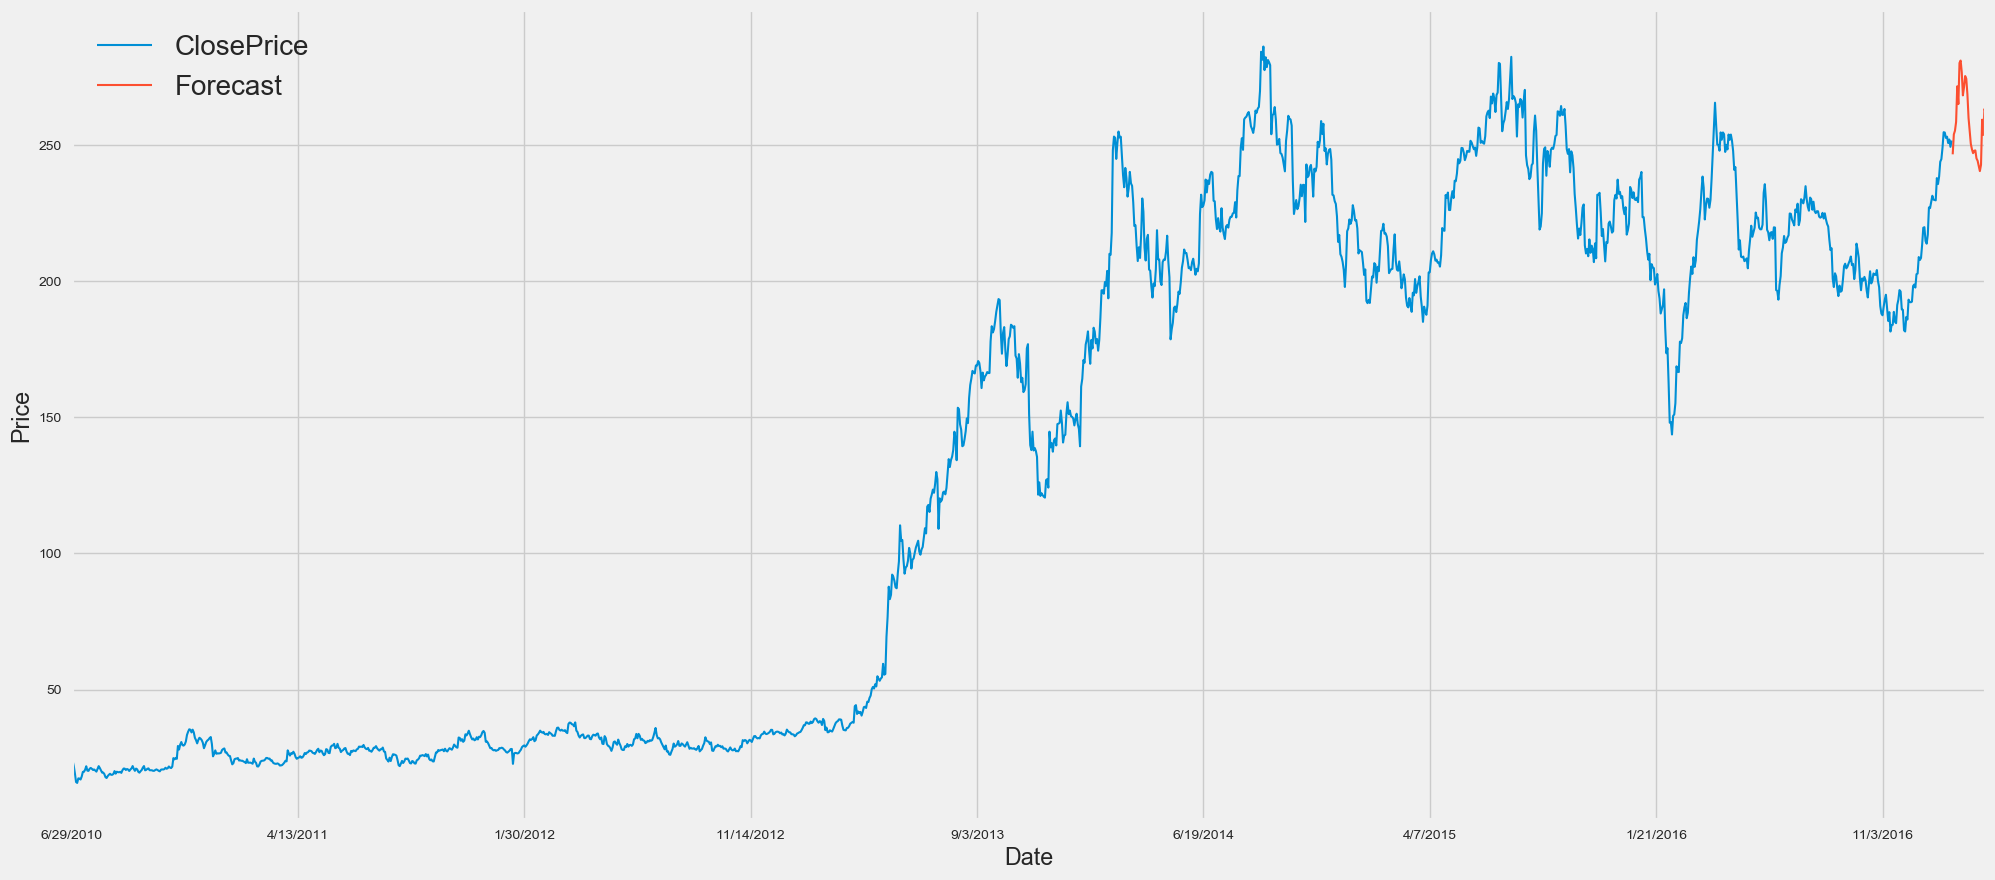

In [64]:
result.plot(figsize=(22,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')

#